**Problem Statement**
In the competitive telecommunications industry, customer churn - where customers become inactive and stop purchasing services - is a significant challenge. An African telecommunications service company is particularly concerned about customers ceasing to purchase airtime and data bundles. This project aims to develop a machine learning model to predict the likelihood of customer churn, helping the company to proactively retain its customer base.


**Project Aim**
The primary aim of this project is to build a predictive model that assesses the likelihood of customers becoming inactive and discontinuing their purchase of airtime and data for a period of 90 days. By leveraging customer data, the model will identify customers at risk of churning, enabling the company to implement targeted retention strategies and interventions.


**Variable Definitions**
The churn dataset includes 19 variables including 15 numerics variables and 04 categorical variables.


*   user_id
*   REGION: The Location of each client

*   TENURE: Duration in the network
*   MONTANT: Top-up amount

*   FREQUENCY_RECH: A number of times the customer refilled
*   REVENUE: Monthly income of each client

*  ARPU_SEGMENT: Income over 90days / 3
*  FREQUENCY: Number of times the client has made an income

*   DATA_VOLUME: Number of connections
*   ON_NET: Inter expresso call

*   ORANGE: Call to orange
*   TIGO: Call to Tigo

*   ZONE1: Call to zones1
*   ZONE2: Call to zones2

*   MRG: A client who is going
*   REGULARITY: Number of times the client is active for 90days

*   TOP_PACK: The most active packs
*   FREQ_TOP_PACK: Number of times the client has activated the top pack packages

*   CHURN: Variable to predict- Target





















**Benefits of the Solution**
1. Enhanced Customer Retention: By identifying at-risk customers, the company can implement timely and personalized interventions, such as improved service plans, to retain them. This directly contributes to maintaining a stable customer base and reducing churn.

2. Cost Efficiency: Retaining existing customers is generally more cost-effective than acquiring new ones. By reducing customer churn, the company can minimize the expenses associated with marketing and sales efforts aimed at attracting new customers, thereby optimizing resource allocation and improving profitability.


In [27]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

In [32]:
from google.colab import files
uploaded = files.upload()


Saving Data.csv to Data.csv


In [33]:
data = pd.read_csv('Data.csv')

In [34]:
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [35]:
data.shape

(400000, 19)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [37]:
#Checking the summary statistics of the numerical datatypes/features
numerical_summary = data.describe()
numerical_summary

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [38]:
#Checking the summary statistics of a categorical or object datatypes/features
category_summary = data.describe(include=['O'])
category_summary

,user_id,REGION,TENURE,MRG,TOP_PACK
count,400000,242480,400000,400000,232671
unique,400000,14,8,1,111
top,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,95517,379439,400000,58675


In [39]:
#Checking for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values)

ZONE2             374487
ZONE1             368310
TIGO              239386
DATA_VOLUME       196854
FREQ_TOP_PACK     167329
TOP_PACK          167329
ORANGE            166317
REGION            157520
ON_NET            145819
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
REGULARITY             0
user_id                0
MRG                    0
TENURE                 0
CHURN                  0
dtype: int64


In [40]:
data.columns=data.columns.str.lower()
print(data.columns)

Index(['user_id', 'region', 'tenure', 'montant', 'frequence_rech', 'revenue',
       'arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
       'zone1', 'zone2', 'mrg', 'regularity', 'top_pack', 'freq_top_pack',
       'churn'],
      dtype='object')


In [41]:
#Selecting numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])
categorical_features = data.select_dtypes(include=['object'])

In [42]:
#Print out the list of numerical and categorical features
print("Numerical Features:")
print(numerical_features.columns)
print("\nCategorical Features:")
print(categorical_features.columns)

Numerical Features:
Index(['montant', 'frequence_rech', 'revenue', 'arpu_segment', 'frequence',
       'data_volume', 'on_net', 'orange', 'tigo', 'zone1', 'zone2',
       'regularity', 'freq_top_pack', 'churn'],
      dtype='object')

Categorical Features:
Index(['user_id', 'region', 'tenure', 'mrg', 'top_pack'], dtype='object')


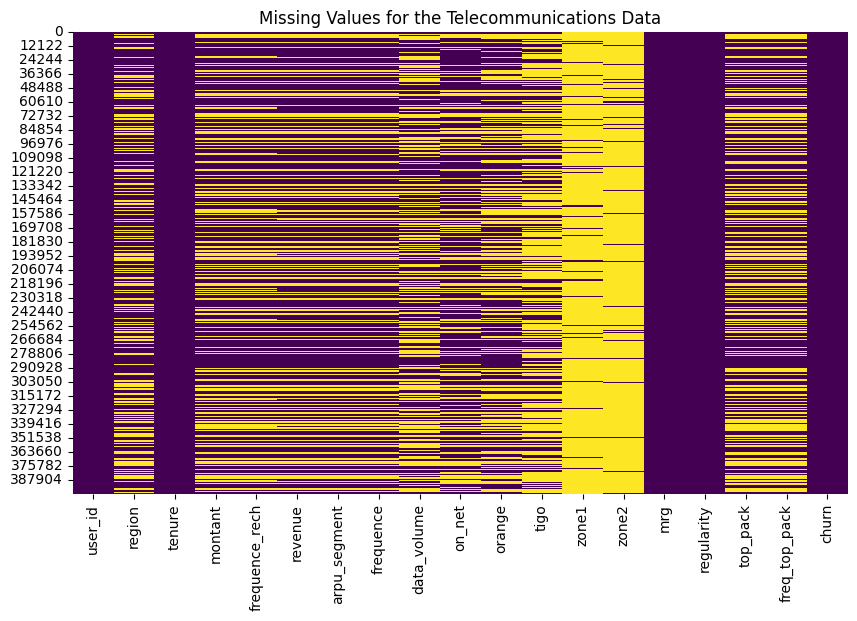

In [43]:
#Visualizing missing data
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap= 'viridis')
plt.title('Missing Values for the Telecommunications Data')
plt.show()

**Data Cleaning**

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   region          242480 non-null  object 
 2   tenure          400000 non-null  object 
 3   montant         259723 non-null  float64
 4   frequence_rech  259723 non-null  float64
 5   revenue         265337 non-null  float64
 6   arpu_segment    265337 non-null  float64
 7   frequence       265337 non-null  float64
 8   data_volume     203146 non-null  float64
 9   on_net          254181 non-null  float64
 10  orange          233683 non-null  float64
 11  tigo            160614 non-null  float64
 12  zone1           31690 non-null   float64
 13  zone2           25513 non-null   float64
 14  mrg             400000 non-null  object 
 15  regularity      400000 non-null  int64  
 16  top_pack        232671 non-null  object 
 17  freq_top_p

In [47]:
#Drop zone1 and zone2
cleaned_data = data.drop(['zone1','zone2'], axis=1)
cleaned_data.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,mrg,regularity,top_pack,freq_top_pack,churn
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NO,50,NaN,NaN,0


In [48]:
#Handling missing values
for i in cleaned_data.columns:
  if cleaned_data[i].dtype == 'object':
    cleaned_data[i].fillna(cleaned_data[i].mode()[0], inplace=True)
  else:
    cleaned_data[i].fillna(cleaned_data[i].mean(), inplace=True)

In [49]:
missing_values = cleaned_data.isnull().sum()
print(missing_values)

user_id           0
region            0
tenure            0
montant           0
frequence_rech    0
revenue           0
arpu_segment      0
frequence         0
data_volume       0
on_net            0
orange            0
tigo              0
mrg               0
regularity        0
top_pack          0
freq_top_pack     0
churn             0
dtype: int64


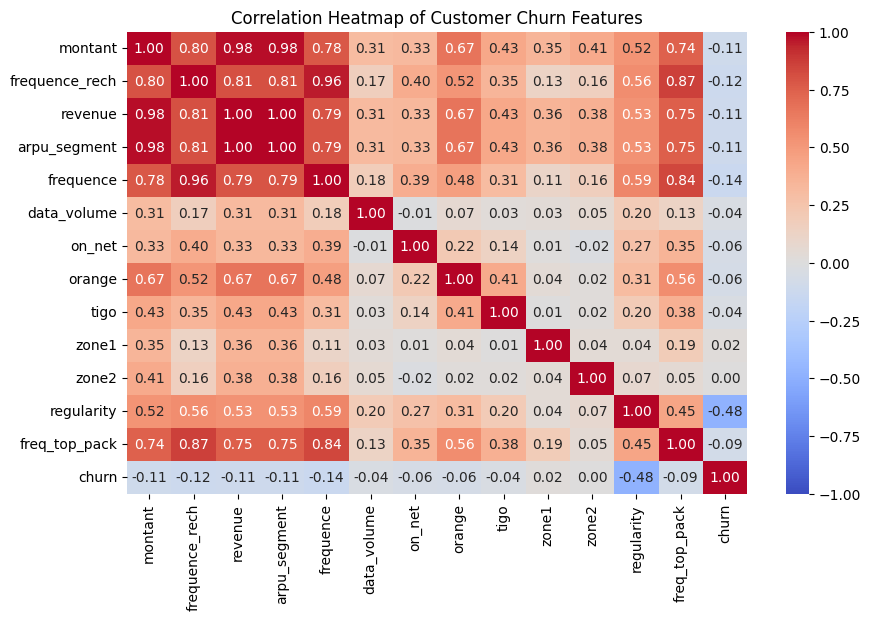

In [50]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
numerical_cols = data.select_dtypes(include=['float64','int64'])
corr_matrix = numerical_cols.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Customer Churn Features")
plt.show()

In [51]:
cleaned_data['churn'].unique()

array([0, 1])

In [53]:
#checking the uniqueness of region
cleaned_data['region'].unique()

array(['SAINT-LOUIS', 'DAKAR', 'TAMBACOUNDA', 'FATICK', 'THIES', 'LOUGA',
       'KAFFRINE', 'DIOURBEL', 'KOLDA', 'MATAM', 'SEDHIOU', 'KAOLACK',
       'ZIGUINCHOR', 'KEDOUGOU'], dtype=object)

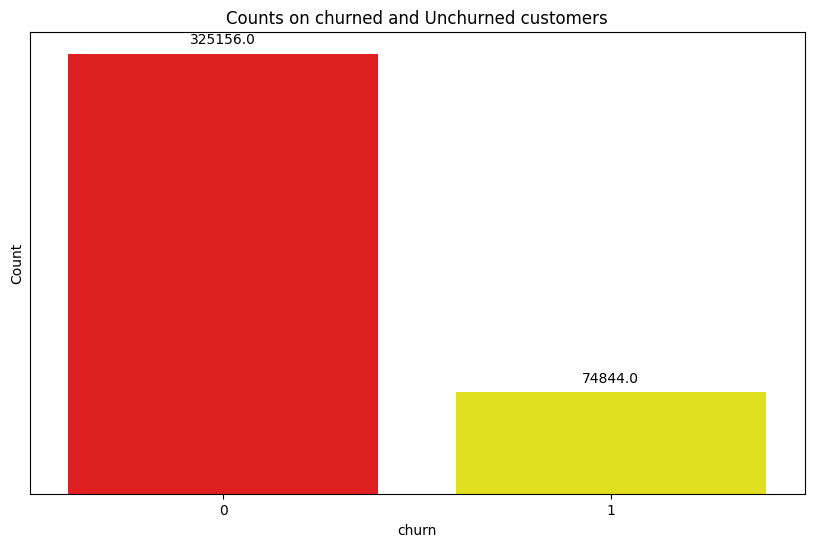

<Figure size 640x480 with 0 Axes>

In [55]:
#Visualizing data on those that Churned
#Countplot
plt.figure(figsize=(10,6))
ax=sns.countplot(x='churn', data=data, palette=['red','yellow'], hue='churn', legend=False)
plt.title('Counts on churned and Unchurned customers')
plt.xlabel('churn')
plt.ylabel('Count')
ax.set_yticks([])

#for data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',xytext=(0,10), textcoords='offset points')
plt.show()
plt.tight_layout()


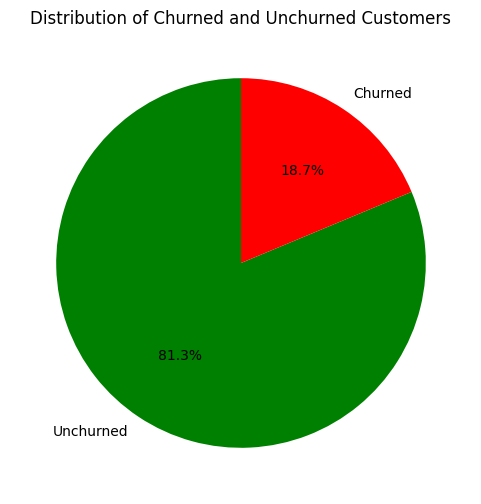

In [58]:
#Visualizing data using pie chart
churn_counts = data['churn'].value_counts()
labels = ['Unchurned', 'Churned']
colors = ['green', 'red']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Churned and Unchurned Customers')

#show plot
plt.show()

**The above pie chart shows the percentage of people that churned against those that did not churn.**

In [59]:
Top_pack = data['top_pack'].iloc[0]
Top_pack

'All-net 500F=2000F;5d'

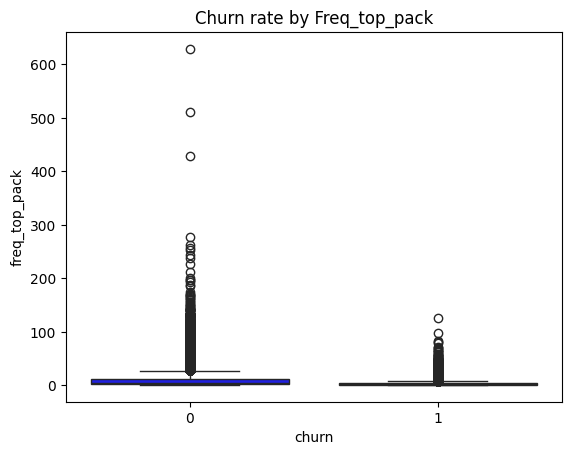

In [60]:
#Churn rate by Freq_top_pack
#Boxplot
sns.boxplot(x='churn', y='freq_top_pack', data=data, palette=['blue','green'], hue='churn', legend=False)
plt.title('Churn rate by Freq_top_pack')
plt.xlabel('churn')
plt.ylabel('freq_top_pack')
plt.show()

**Preprocessing data**

In [71]:
#Drop user_id
categorical_features = data.select_dtypes(include=['object']).drop(['user_id'], axis=1)



In [76]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [79]:
#encode Categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_features:
    cleaned_data[col] = label_encoder.fit_transform(cleaned_data[col])

In [81]:
cleaned_data

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,mrg,regularity,top_pack,freq_top_pack,churn
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,9,7,17000.000000,32.000000,18000.000000,6000.000000,34.000000,3369.763441,97.000000,355.000000,6.000000,0,62,15,35.000000,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,0,7,4300.000000,29.000000,4427.000000,1476.000000,37.000000,1764.000000,8.000000,3.000000,0.000000,0,40,25,22.000000,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,11,7,1500.000000,3.000000,1500.000000,500.000000,3.000000,3369.763441,30.000000,30.000000,23.134608,0,32,15,3.000000,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,2,7,1500.000000,3.000000,2497.000000,832.000000,4.000000,0.000000,159.000000,45.000000,19.000000,0,18,84,3.000000,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,2,7,5522.971346,11.503733,498.000000,166.000000,3.000000,1.000000,1.000000,3.000000,23.134608,0,50,15,9.254209,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,a892ad4ed0eda8dc721733200c47147763b183ec,11,7,700.000000,2.000000,704.000000,235.000000,3.000000,3369.763441,12.000000,14.000000,23.134608,0,46,15,1.000000,0
399996,13daa3a651bf0192a413b339c4766aeafc6d1636,0,7,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,0,14,15,9.254209,0
399997,767f596aee426962f7d92f4de8d7b232cdc17568,0,7,700.000000,2.000000,699.000000,233.000000,5.000000,237.000000,1.000000,95.532927,23.134608,0,15,25,3.000000,0
399998,b831e4d3b59a1e294e9e0a2aab391bc12d50845c,0,7,5522.971346,11.503733,9.000000,3.000000,1.000000,0.000000,275.917586,0.000000,23.134608,0,5,15,9.254209,1


In [87]:
features = cleaned_data.drop(['user_id','churn'], axis=1)
features

,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,mrg,regularity,top_pack,freq_top_pack
0,9,7,17000.000000,32.000000,18000.000000,6000.000000,34.000000,3369.763441,97.000000,355.000000,6.000000,0,62,15,35.000000
1,0,7,4300.000000,29.000000,4427.000000,1476.000000,37.000000,1764.000000,8.000000,3.000000,0.000000,0,40,25,22.000000
2,11,7,1500.000000,3.000000,1500.000000,500.000000,3.000000,3369.763441,30.000000,30.000000,23.134608,0,32,15,3.000000
3,2,7,1500.000000,3.000000,2497.000000,832.000000,4.000000,0.000000,159.000000,45.000000,19.000000,0,18,84,3.000000
4,2,7,5522.971346,11.503733,498.000000,166.000000,3.000000,1.000000,1.000000,3.000000,23.134608,0,50,15,9.254209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,11,7,700.000000,2.000000,704.000000,235.000000,3.000000,3369.763441,12.000000,14.000000,23.134608,0,46,15,1.000000
399996,0,7,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,0,14,15,9.254209
399997,0,7,700.000000,2.000000,699.000000,233.000000,5.000000,237.000000,1.000000,95.532927,23.134608,0,15,25,3.000000
399998,0,7,5522.971346,11.503733,9.000000,3.000000,1.000000,0.000000,275.917586,0.000000,23.134608,0,5,15,9.254209


In [88]:
# scale the data
scaler = StandardScaler()
cleaned_scaled = scaler.fit_transform(features)

In [90]:
#target variable
cleaned_data['churn'] = cleaned_data['churn'].astype('category')

In [92]:
#Defining the features and target variable
X = cleaned_scaled
y = cleaned_data['churn']

In [105]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, roc_curve

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:

#use Logistic Regression
model = LogisticRegression(max_iter=1000)

In [103]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [104]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [106]:
# y_test, y_pred, and y_pred_prob are defined
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[59499  5524]
 [ 5258  9719]]
ROC AUC Score: 0.91
accuracy : 87.0 %


In [107]:
# Print the classification report
classification_report_output = classification_report(y_test, y_pred)
print(classification_report_output)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     65023
           1       0.64      0.65      0.64     14977

    accuracy                           0.87     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.87      0.87      0.87     80000



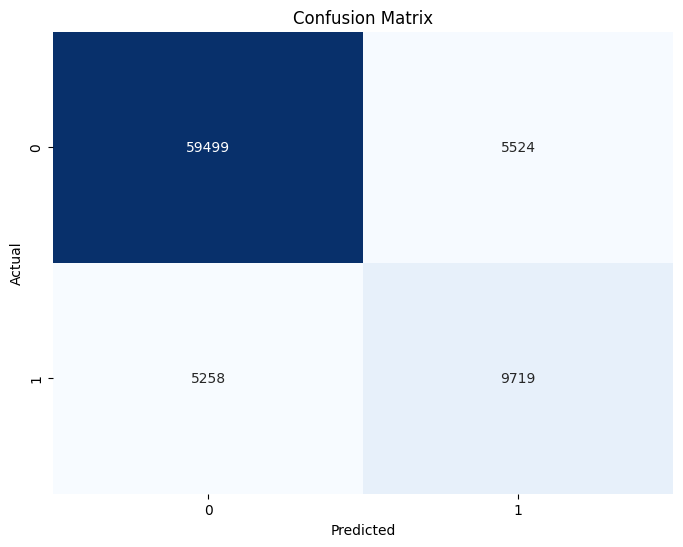

In [108]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()